In [16]:
import numpy as np
import pandas as pd

data = pd.read_excel('ROTATION2.xlsx')
print(data.shape)
data=data.dropna()
print(data.shape)

(71059, 35)
(71057, 35)


In [17]:
shape=data.shape
N=shape[0]-1

X = np.zeros((N,13,1))
Ls = np.zeros((N,3,1))


Y = np.zeros((N,13))
LPF = np.zeros((N,1))

for ii in range(0,N):
    q1 = int(data.iloc[ii,0])
    q2 = int(data.iloc[ii,1])
    q3 = int(data.iloc[ii,2])
    
    l1 = data.iloc[ii,3]
    l2 = data.iloc[ii,4]
    l3 = data.iloc[ii,5]

    
    
    
    X[ii,q1,0] = 1
    X[ii,q2,0] = 1
    X[ii,q3,0] = 1
    
    Ls[ii,0,0]=l1*0.01
    Ls[ii,1,0]=l2*0.01
    Ls[ii,2,0]=l3*0.01
    
    Y[ii,:] = data.iloc[ii][[10,12,14,16,18,20,22,24,26,28,30,32,34]]
    LPF[ii,0]= data.iloc[ii][6]

    
xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12]



    

In [18]:
#print(X[0])
#print(Ls[0])
data.isnull().any()


P1         False
P2         False
P3         False
L1         False
L2         False
L3         False
LPF        False
L1_real    False
L2_real    False
L3_real    False
r0         False
r1         False
r2         False
r3         False
r4         False
r5         False
r6         False
r7         False
r8         False
r9         False
r10        False
r11        False
r12        False
r13        False
r14        False
r15        False
r16        False
r17        False
r18        False
r19        False
r20        False
r21        False
r22        False
r23        False
r24        False
dtype: bool

Tensor("dense_7/Relu:0", shape=(?, 13), dtype=float32)
Tensor("dense_8/BiasAdd:0", shape=(?, 3), dtype=float32)
Train on 71056 samples, validate on 71056 samples
Epoch 1/30
71056/71056 [==============================] - 12s 173us/step - loss: 3.5686e-04 - val_loss: 2.5629e-05
Epoch 2/30
71056/71056 [==============================] - 10s 146us/step - loss: 2.2184e-05 - val_loss: 2.0732e-05
Epoch 3/30
71056/71056 [==============================] - 9s 133us/step - loss: 1.9916e-05 - val_loss: 1.6644e-05
Epoch 4/30
71056/71056 [==============================] - 9s 129us/step - loss: 1.7640e-05 - val_loss: 1.6041e-05
Epoch 5/30
71056/71056 [==============================] - 9s 127us/step - loss: 1.4821e-05 - val_loss: 1.3294e-05
Epoch 6/30
71056/71056 [==============================] - 9s 132us/step - loss: 1.3493e-05 - val_loss: 1.2613e-05
Epoch 7/30
71056/71056 [==============================] - 10s 135us/step - loss: 1.2470e-05 - val_loss: 1.1322e-05
Epoch 8/30
71056/71056 [=============

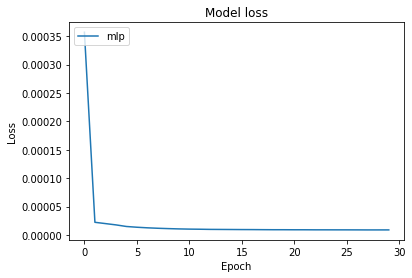

In [19]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(13,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
x = Conv1D(128, kernel_size=1, activation="relu")(inputA)
x = Conv1D(64, kernel_size=1, activation="relu")(x)
x = Conv1D(32, kernel_size=1, activation="relu")(x)
x = Conv1D(24, kernel_size=1, activation="relu")(x)
x = Conv1D(13, kernel_size=1, activation="relu")(x)
x = Flatten()(x)
x = Dense(13, activation="relu")(x)
x = krs.Model(inputs=inputA, outputs=x)

print(x.output)

# the second branch opreates on the second input
y = Dense(3, activation="linear")(inputB)
y = krs.Model(inputs=inputB, outputs=y)

print(y.output)

# combine the output of the two branches
combined = krs.layers.concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(64, activation="relu")(combined)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(13, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model = krs.Model(inputs=[x.input, y.input], outputs=z)


model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1))
history1 = model.fit( [X,Ls[:,:,0]], Y, validation_data=([X,Ls[:,:,0]], Y), epochs=30, batch_size=32, verbose=1)  

 
    
    
plt.figure()
# Plot training & validation loss values
plt.plot(history1.history['loss'],label = 'mlp')
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.] [346. 346. 173.]


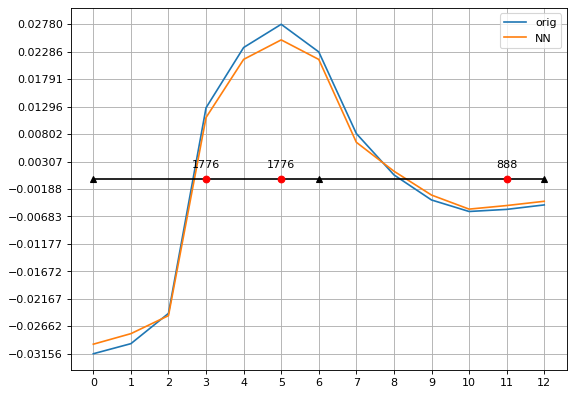

[0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.] [171.   85.5 171. ]


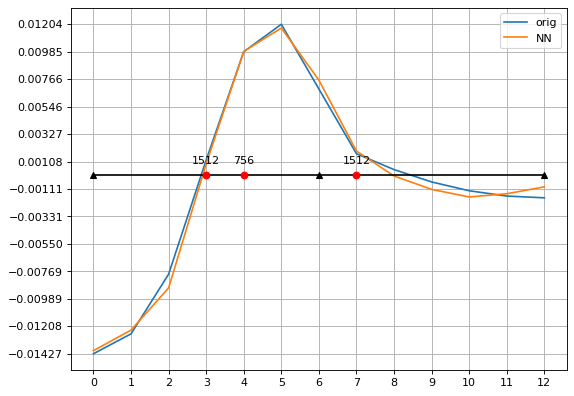

[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.] [350. 350. 175.]


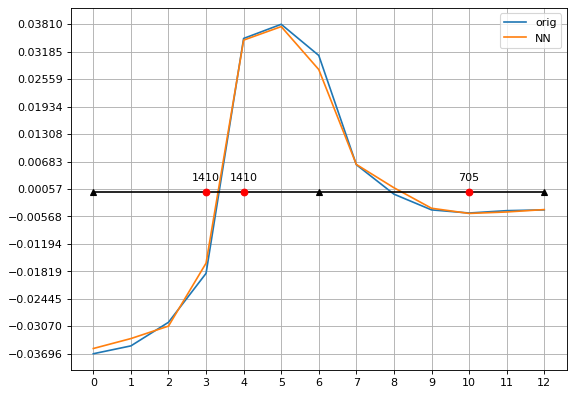

[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.] [46. 46. 92.]


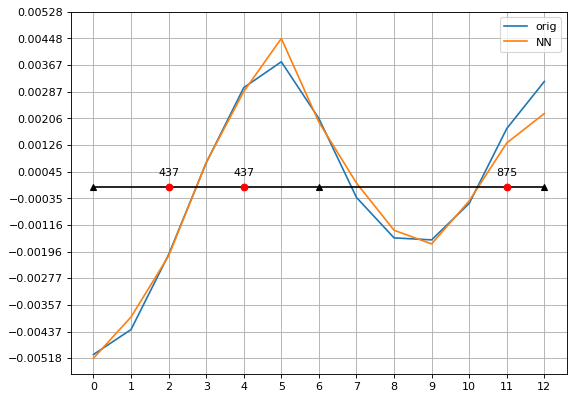

[0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [240. 120. 120.]


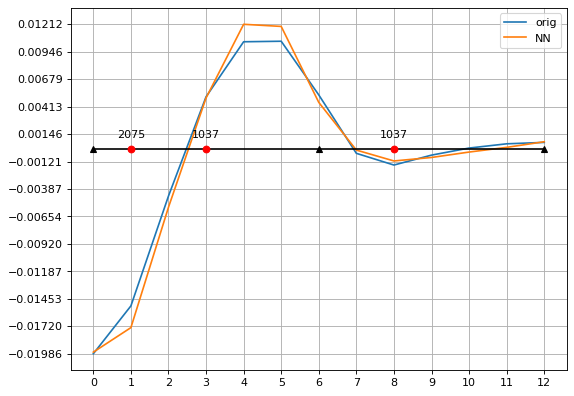

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.] [15. 15. 15.]


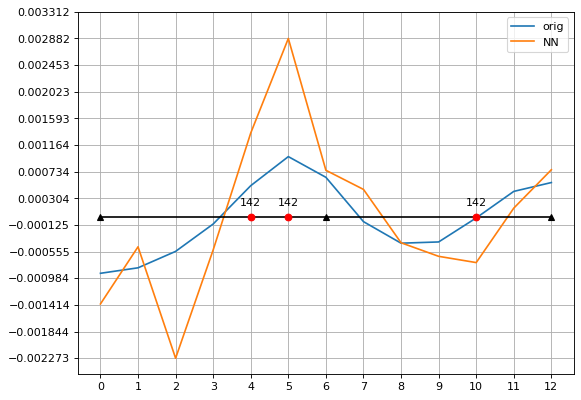

[0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [362. 362. 181.]


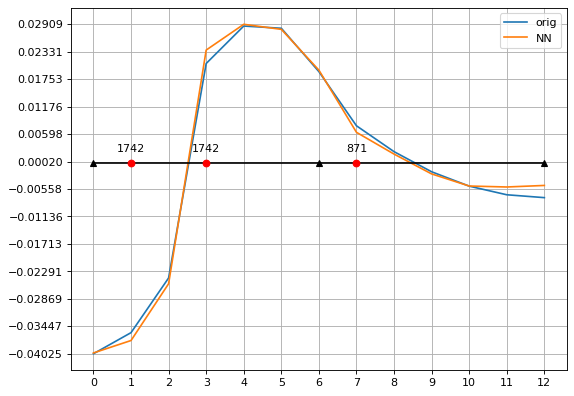

[0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.] [310. 310. 620.]


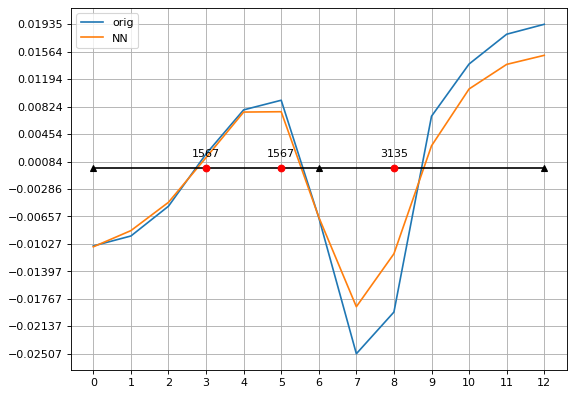

[0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.] [320. 640. 320.]


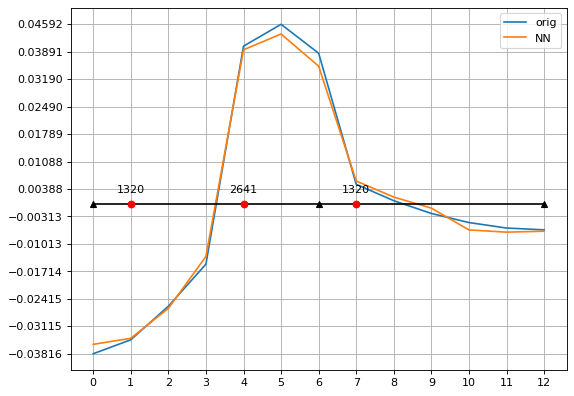

[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.] [269. 538. 269.]


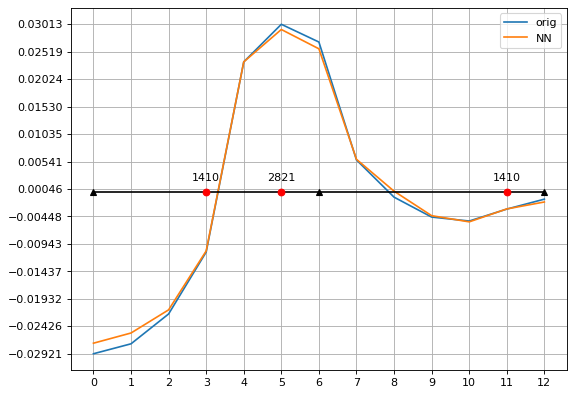

[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.] [16.  8. 16.]


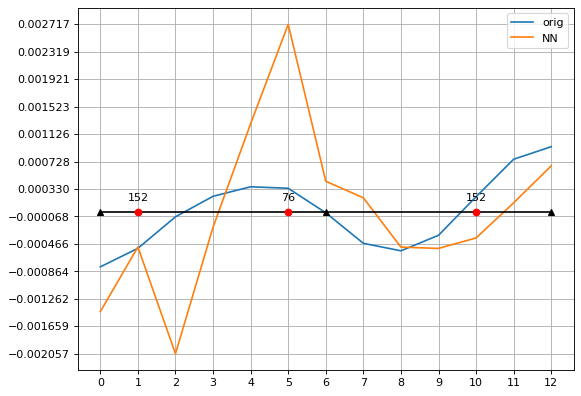

[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.] [309. 309. 309.]


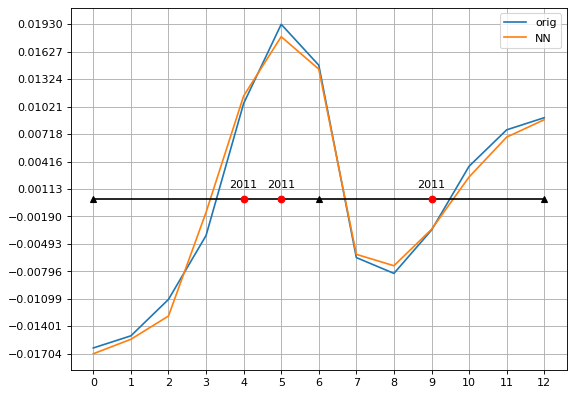

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [1.  1.  0.5]


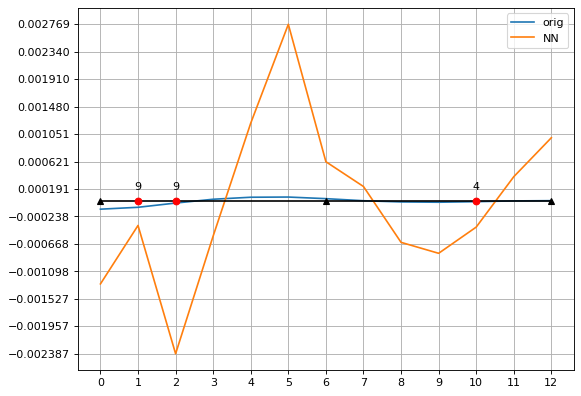

[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.] [115. 230. 115.]


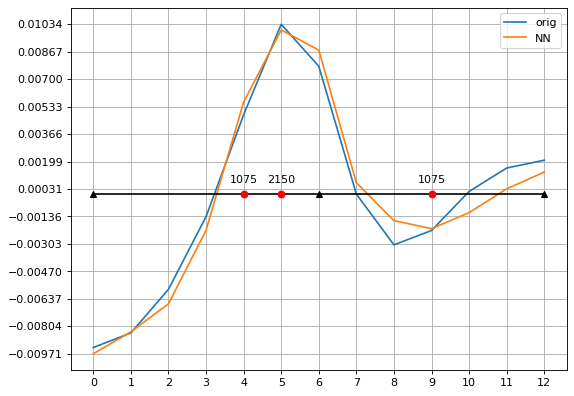

[0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.] [303. 606. 606.]


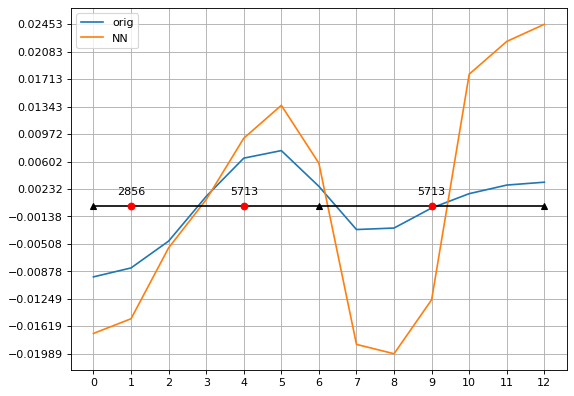

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [324. 162. 162.]


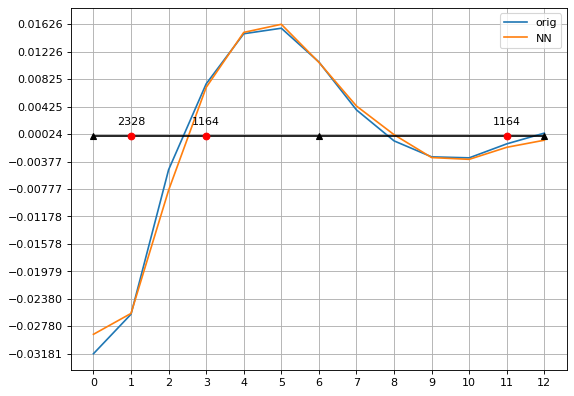

[0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [158.  79. 158.]


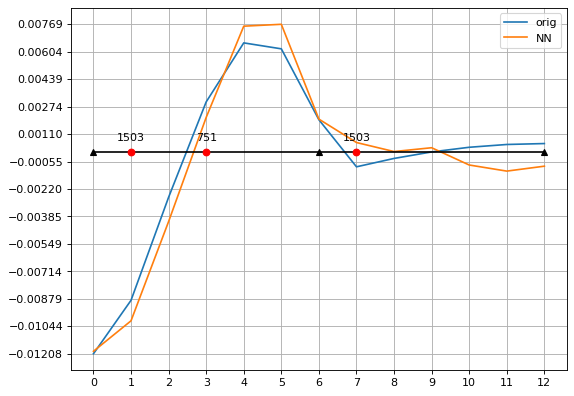

[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.] [177.  177.   88.5]


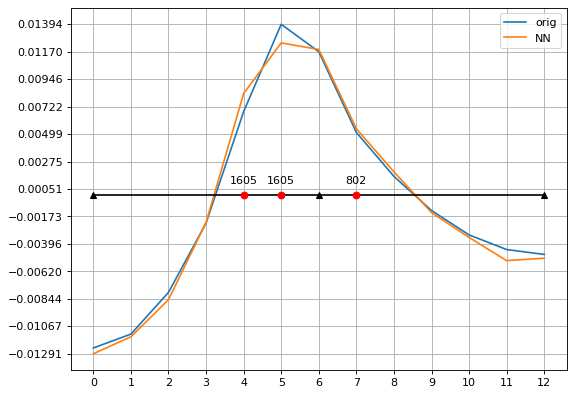

[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.] [166. 166. 166.]


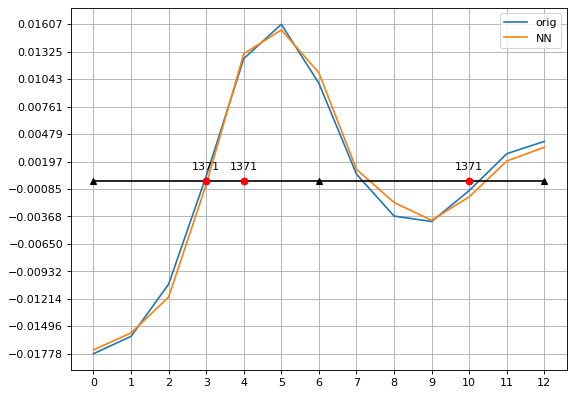

[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.] [319.  159.5 638. ]


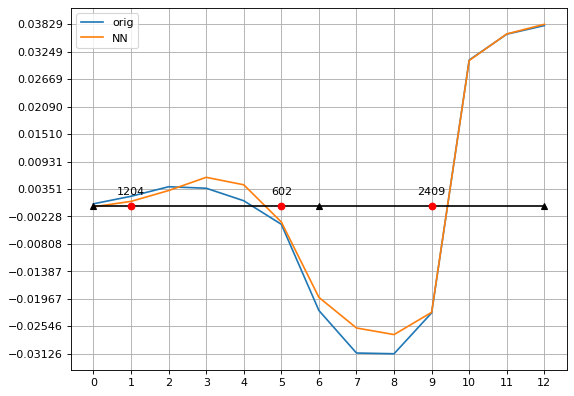

[0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [212. 212. 106.]


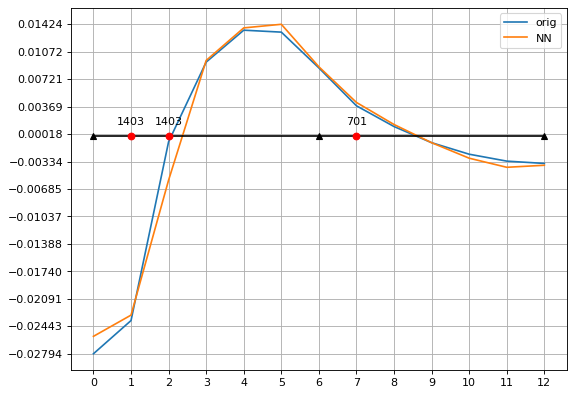

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [394. 197. 788.]


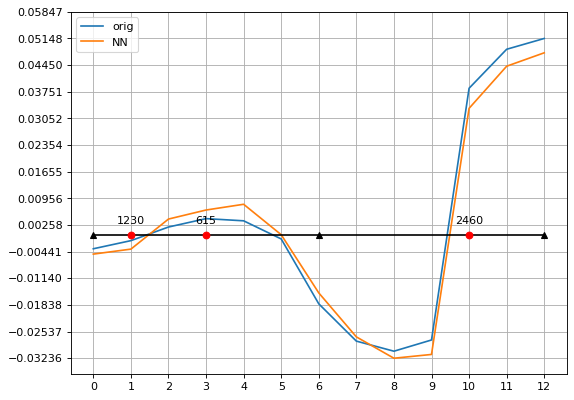

[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.] [302. 151. 151.]


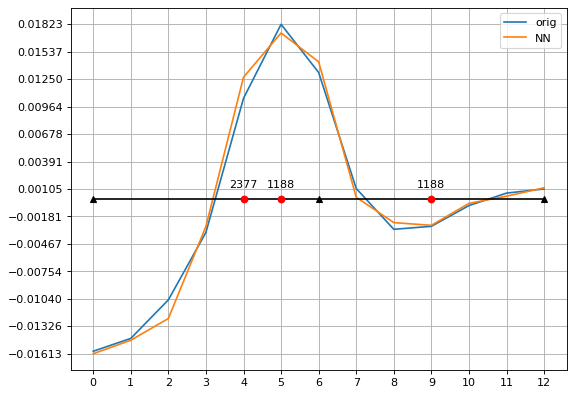

[0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [181.  362.   90.5]


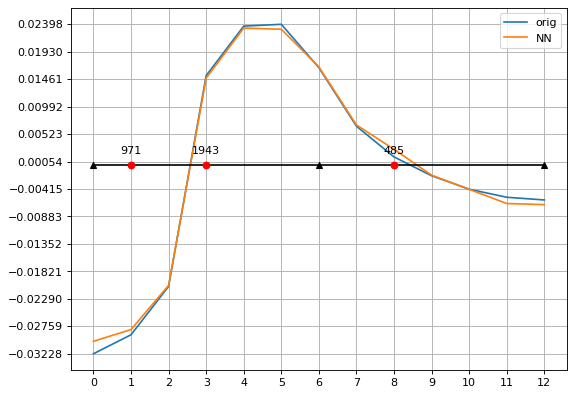

[0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.] [44. 88. 44.]


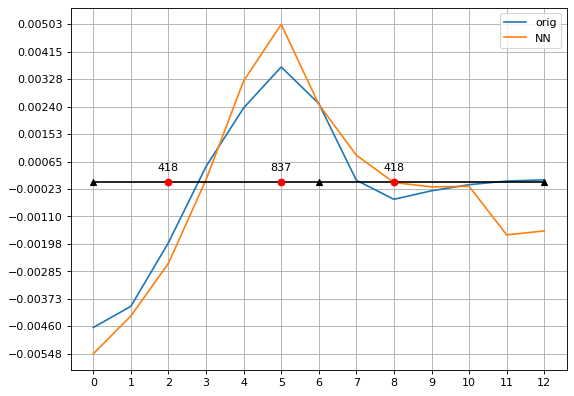

[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [132. 264.  66.]


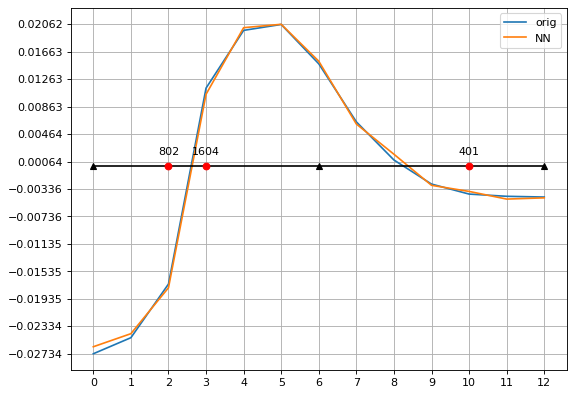

[0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.] [ 7. 14. 14.]


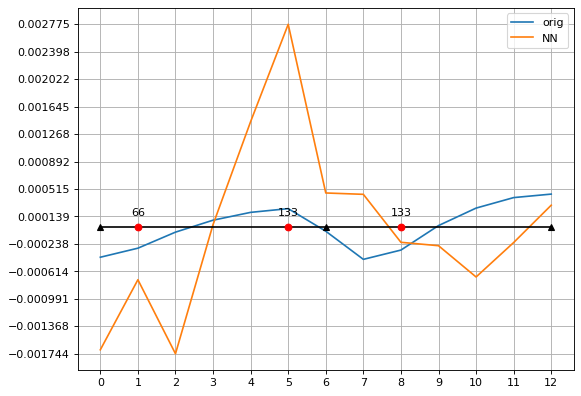

[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.] [82. 82. 41.]


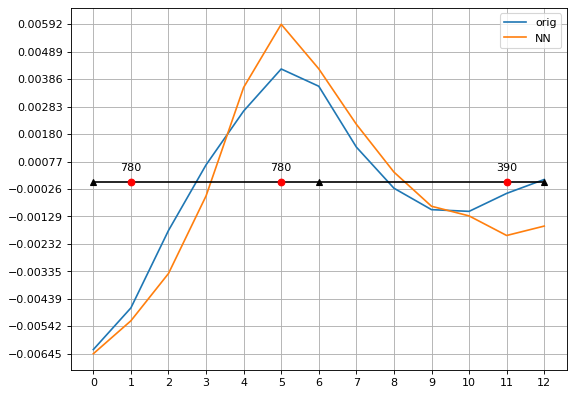

[0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.] [141. 282. 141.]


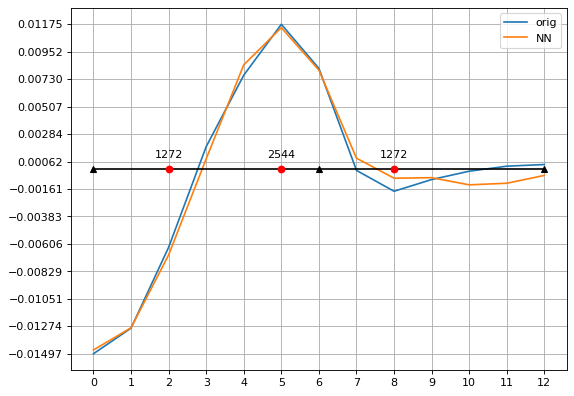

[0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [230. 230. 460.]


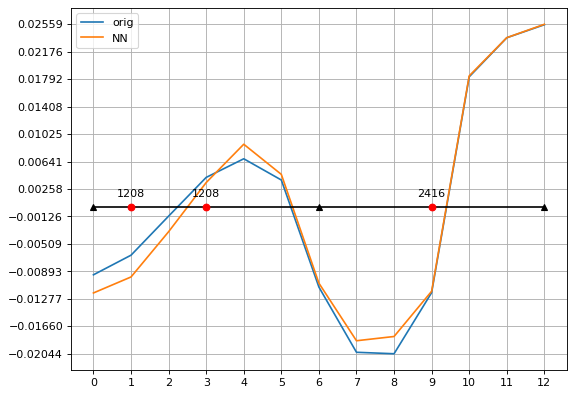

In [20]:
y_pred1 = model.predict([X,Ls[:,:,0]])
import time
from matplotlib.pyplot import figure


for ii in range(2900,2930):
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    print(X[ii,:,0],Ls[ii,:,0]*100)
    
    maximo = max([max(y_pred1[ii,:]),max(Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(Y[ii,:])])
        
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,6,12],[0,0,0],'^k')
    loads=np.where(X[ii,:,0]==1)[0]
    plt.plot(loads,[0,0,0],'ro')
    
    for i in range(0,3):
        plt.annotate(int(Ls[ii,i,0]*LPF[ii,0]*100), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

        
    stepd=(maximo-minimo)/12.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()

In [21]:

np.set_printoptions(precision=3)



err = np.sum(np.abs(y_pred1-Y)/N,axis=0)
print("errors1\n ", err)





errors1
  [0.001 0.001 0.002 0.001 0.001 0.002 0.001 0.001 0.001 0.001 0.001 0.001
 0.001]


In [22]:
Pos = np.zeros((13,13,1))
Pesos_05 = np.zeros((13,3,1))
Pesos_1 = np.zeros((13,3,1))
Pesos_2 = np.zeros((13,3,1))

for i in range(13):
    Pos[i,2,0] = 1
    Pos[i,4,0] = 1
    Pos[i,9,0] = 1
    Pesos_05[i,0,0] = 30*(i+1)*0.01
    Pesos_05[i,1,0] = 30*(i+1)/2*0.01
    Pesos_05[i,2,0] = 30*(i+1)/2*0.01
    Pesos_1[i,0,0] = 30*(i+1)*0.01
    Pesos_1[i,1,0] = 30*(i+1)*0.01
    Pesos_1[i,2,0] = 30*(i+1)*0.01
    Pesos_2[i,0,0] = 30*(i+1)*0.01
    Pesos_2[i,1,0] = 30*(i+1)*2*0.01
    Pesos_2[i,2,0] = 30*(i+1)*2*0.01
    
    
Inc_SK_05 = model.predict([Pos,Pesos_05[:,:,0]])
Inc_SK_1 = model.predict([Pos,Pesos_1[:,:,0]])
Inc_SK_2 = model.predict([Pos,Pesos_2[:,:,0]])

print(Pesos_1[:,:,0])

[[0.3 0.3 0.3]
 [0.6 0.6 0.6]
 [0.9 0.9 0.9]
 [1.2 1.2 1.2]
 [1.5 1.5 1.5]
 [1.8 1.8 1.8]
 [2.1 2.1 2.1]
 [2.4 2.4 2.4]
 [2.7 2.7 2.7]
 [3.  3.  3. ]
 [3.3 3.3 3.3]
 [3.6 3.6 3.6]
 [3.9 3.9 3.9]]


In [27]:
SK05 =  pd.read_csv('rotation_alpha05_beta05.csv', header=None)
SK1 =  pd.read_csv('rotation_alpha1_beta1.csv', header=None)
SK2 =  pd.read_csv('rotation_alpha2_beta2.csv', header=None)
print(SK1)

def make_graph(_xx,_var,SK):
    sk=[]
    load=[]
    for i in range(0,13):
        load.append(int(SK.iloc[i][3]*SK.iloc[i][6]))
        sk.append(SK.iloc[i][[8,10,12,14,16,18,20,22,24,26,28,30,32]])
    



    figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
    maxes=[]
    mins=[]
    for i in range(0,13):
        maxes.append(max(max(_var[i]),max(sk[i])))
        mins.append(min(min(_var[i]),min(sk[i])))
        plt.plot(_xx,_var[i],'r',label=str(load[i])+'N-Rede') 
        plt.plot(_xx,sk[i],'b',label=str(load[i])+'N-Original')

    stepd=(max(maxes)-min(mins))/20.0
    plt.yticks(np.arange(min(mins), max(maxes)+stepd ,step=stepd))
    plt.xticks(xticks)
    plt.grid(True)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    
    np.set_printoptions(precision=3)
    
    
    err = np.sum(np.abs((_var-sk)/sk*100)/12,axis=0)
    print("errors1\n ", err)

     0    1    2      3      4      5         6    7         8         9   \
0   2.0  4.0  9.0   30.0   30.0   30.0  9.517813      -0.003207 -0.003086   
1   2.0  4.0  9.0   60.0   60.0   60.0  9.517813      -0.006413 -0.006171   
2   2.0  4.0  9.0   90.0   90.0   90.0  9.517813      -0.009620 -0.009257   
3   2.0  4.0  9.0  120.0  120.0  120.0  9.373247      -0.012853 -0.012376   
4   2.0  4.0  9.0  150.0  150.0  150.0  8.765057      -0.016174 -0.015616   
5   2.0  4.0  9.0  180.0  180.0  180.0  8.279728      -0.019428 -0.018795   
6   2.0  4.0  9.0  210.0  210.0  210.0  7.444111      -0.022804 -0.022145   
7   2.0  4.0  9.0  240.0  240.0  240.0  6.519856      -0.023070 -0.022411   
8   2.0  4.0  9.0  270.0  270.0  270.0  5.795354      -0.029528 -0.028869   
9   2.0  4.0  9.0  300.0  300.0  300.0  5.215819      -0.032915 -0.032256   
10  2.0  4.0  9.0  330.0  330.0  330.0  4.741653      -0.036269 -0.035610   
11  2.0  4.0  9.0  360.0  360.0  360.0  4.346516      -0.039652 -0.038993   

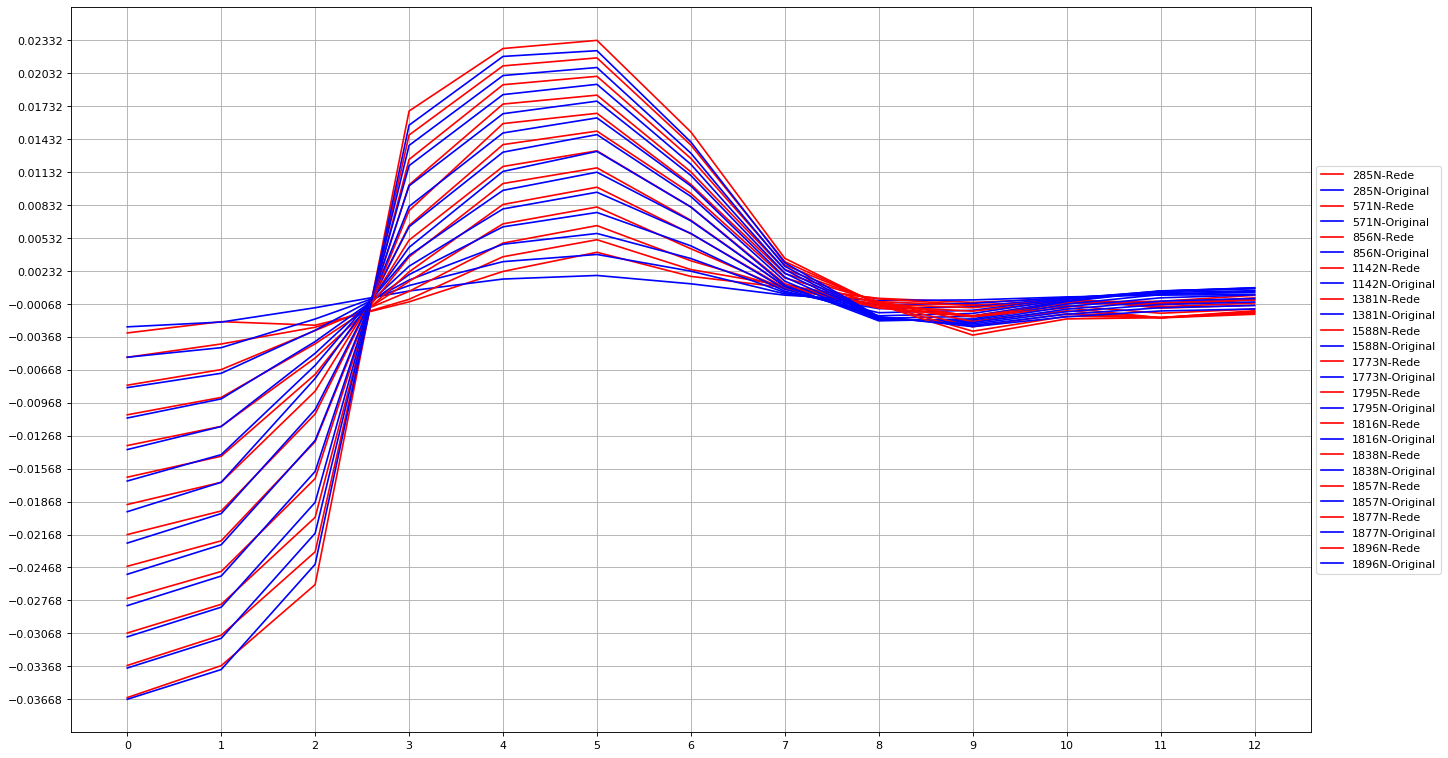

errors1
  [3.6966746410418505 1.9669391381244496 22.17956473783268 40.78963314173783
 9.044048935176441 16.08384326206822 8.510196670127867 98.2379507559004
 65.9464131953168 20.896237605186457 100.99334446616767 480.1441181411136
 335.89537424896986]


In [28]:
make_graph(xticks,Inc_SK_05,SK05)


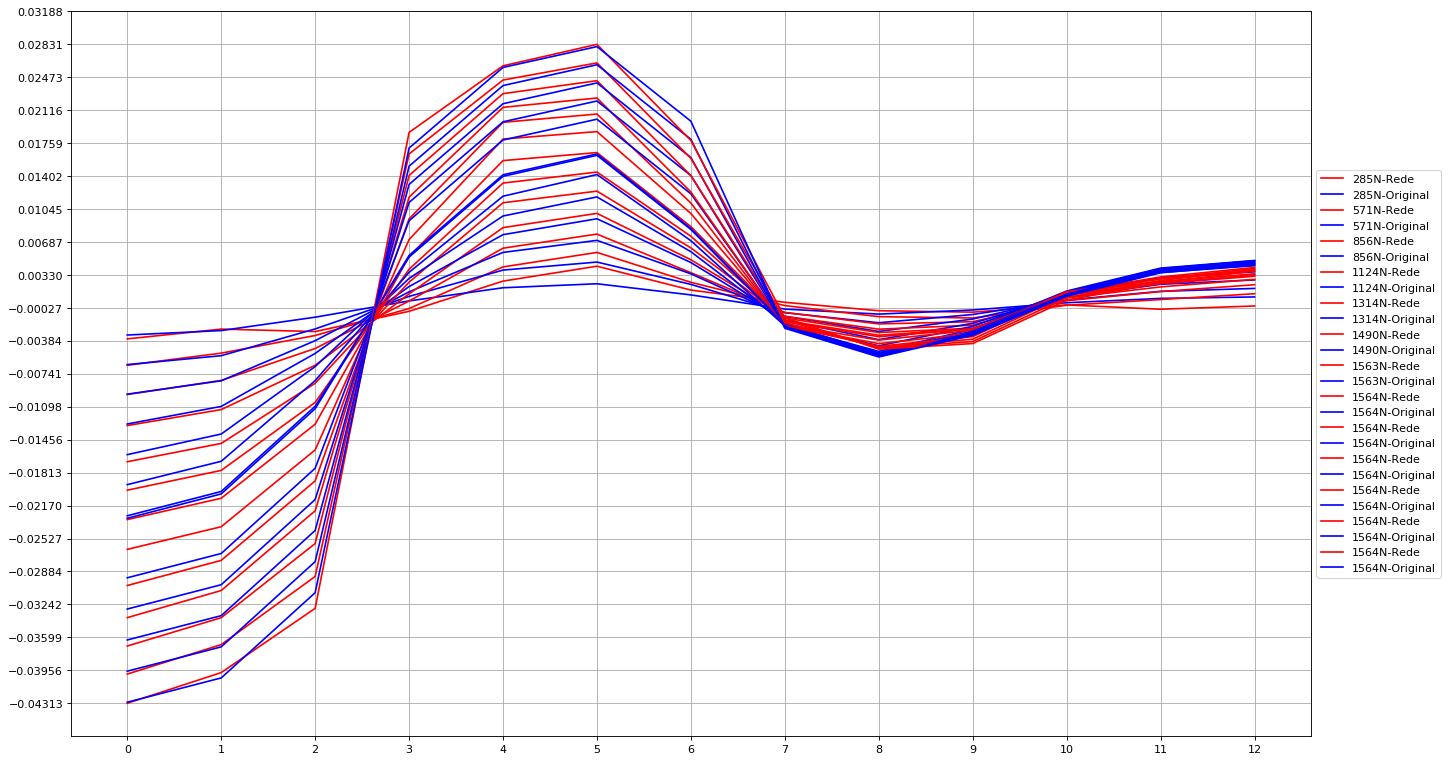

errors1
  [4.052338839841613 4.6984077693864075 28.49591752221656 46.58720973649007
 13.137793179828327 12.478364165287266 13.186721779714809
 43.482013642340725 29.219639002079866 18.67722268148085 35.34701776865271
 45.64808365544538 30.631923017862707]


In [29]:
make_graph(xticks,Inc_SK_1,SK1)

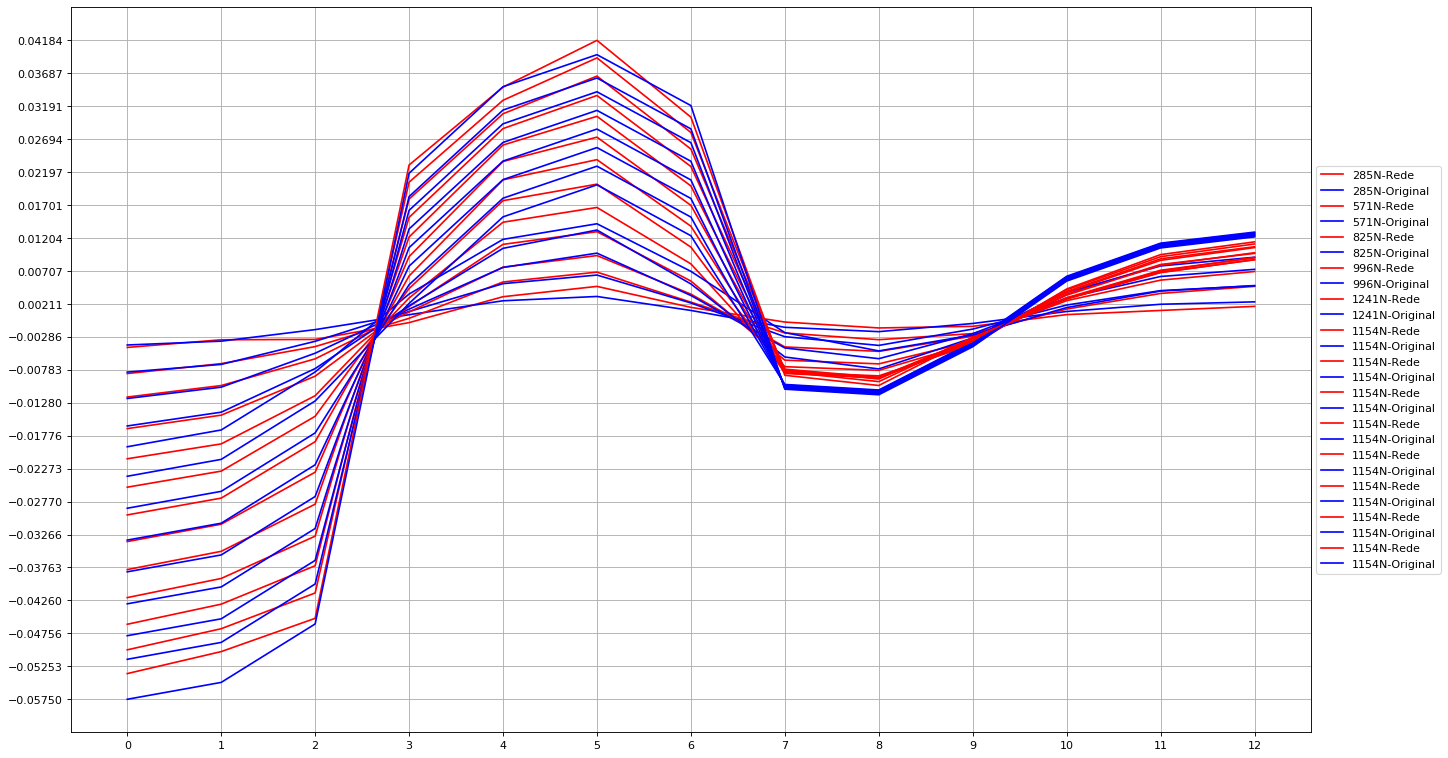

errors1
  [4.377242357723326 5.033658412757681 18.952755206307 51.15362040504474
 10.785044715593926 10.195715082975664 10.408411789463937
 40.883148591612205 23.10900499854404 25.99077385237777 49.331409876496764
 34.0277920092182 27.93710535589941]


In [30]:
make_graph(xticks,Inc_SK_2,SK2)